In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({'font.size': 14})
plt.rcParams['lines.linewidth'] = 3
pi=np.pi

ME 3264 - Applied Measurements Laboratory
=====================================

Lab #3a - Fluid Flow Measurement
=====================================

## Objective
The objectives of this laboratory are :

1. To use different fluid flow measurement devices - venturi meter, rotameter, turbine meter
2. To understand the advantages and disadvantages of of different fluid flow measurement devices

## Background
### Flow Measurement

Flow measurement is the quantification of bulk fluid movement. Accurate measurement of the flow rate of liquids and gases is an essential requirement for maintaining the quality of industrial processes. In fact, most of the industrial control loops control the flow rates of incoming liquids or gases in order to achieve the control objectives. 

Flow can be measured in a variety of ways depending upon the requirements. It could be volumetric or mass flow rate, the medium could be gas or liquid, the measurement could be intrusive or non-intrusive, and so on. As a result, there are different types of flow measuring techniques that are used in industries. In this lab, the focus is on four flow measurement techniques - volumetric technique(Fig. 1a), rotameter (Fig. 1b), Venturi meter (Fig. 2a), and turbine meter (Fig. 2b). 


![figure 1](./flowmeters_1.png)

<center>Figure 1:  (a) volumetric technique (b)Rotameter  </center>

<!-- <center><img src="./flowmeters_1.png" alt="Drawing" style="width: 600px;"/> </center> -->


![figure 2](./flowmeters_2.png)
<center>Figure 2:  (a) Venturi meter (b)Turbine meter    </center>


<!-- <center><img src="./flowmeters_2.png" alt="Drawing" style="width: 600px;"/> </center> -->
<!-- <center>Figure 2:  (a) Venturi meter (b)Turbine meter    </center> -->

#### Volumetric technique 

The Hydraulic Bench provides a reservoir with sloping sides connected to
an external sight tube with 5-litre markings to
measure the contents of this reservoir (Fig. 1a). To measure volumetric
flow rate ($Q$), the outlet in the base of the reservoir is closed by
the use of a drain plug column, and a stopwatch is used to measure
$\Delta t$, the time required for the water level to rise between chosen
graduations. The outlet is then opened to return the contents of the
reservoir to the sump.  Volumetric flowrate $Q$ is obtained as,

$\small  Q = \frac{V}{\Delta t}$  (1)

where $V$ is the volume of water obtained from the water level of the reservoir.


#### Rotameter

A rotameter is a variable-area volumetric flow measurement device that consists of a graduated vertical tapered tube with the fluid flow moving upward through the tube, past the float, as shown in Fig. 1b. Rotameter's accuracy is ±3% of full-scale reading. 

Rotameter uses the principle of force balance on the float. The float remains stationary when the weight of the float is balanced by the buoyancy and pressure drag force. When the float is in a particular position for a flow rate, the differential pressure varies with the square of flow rate (from Bernoulli’s principle). Therefore, to keep differential pressure constant for some other flow rate, the annular area in between the float and vertical tube must change. Rotameters are designed to have a linear relationship between the position of the float ($x$) and flow rate by making the area of cross-section of the tube vary linearly with the vertical height.

$\small  Q = K_1 + K_2 x$  (2)

where constants $K_1$ and $K_2$ are obtained from the calibration curve of the device.


#### Venturi meter

A venturi meter (Fig. 2a) is an obstructive type flowmeter in which the fluid flowing through a pipe is led
through a contraction section to a throat having a smaller cross-sectional area than the pipe,
resulting in a pressure variation along the meter. The differential pressure output is then calibrated in terms of volume flow rate based on Bernoulli's equation. Applying Bernoulli's principle and continuity equation between flowmeter inlet (point 1) and throat section (point 2) gives,

$\small Q_{theory}= \frac{A_2}{\sqrt{[1-(\frac{A_2}{A_1})^2]}} {\sqrt{\frac{2g(p_1 - p_2)}{\rho}}}$   (3)

where $Q_{theory}$ is the theoretical volume flowrate, $A$ denotes area, $p$ is the pressure, $\rho$ is the fluid density and $g$ is the acceleration due to gravity. 

Bernoulli's principle operates under the assumption that viscous effects are negligible. For venturi meters, the discharge coefficient $C_d$  is used to account for viscous effects in the flow and to calculate actual flowrate $Q$,

$\small Q = C_d Q_{theory}$  (4)

For a given fluid and venturi-meter, quantities - $\rho$,$g$, $A_1$,$A_2$,$C_d$, are constants. Then the Eqn. 3 and Eqn.4 can be combined to obtain simplified caliberation equation,

$\small Q = C \sqrt {\Delta p}$  (5)

where, C is is caliberation constant which depends on quantities - $\rho$,$g$, $A_1$,$A_2$,$C_d$.

Note that pressure in Eqn. 3 & 5 can be expressed as absolute pressure, gauge pressure, or mm of a water column as long as the user is consistent and use the same pressure definition at all locations.

#### Turbine flowmeter

The turbine flowmeters (Fig. 2b) are inferential type flowmeters that operate on the principle of transformation of linear momentum of the fluid into angular momentum of the turbine blades. This angular velocity is picked
up magnetically through the hall sensor and calibrated to provide a very accurate measure of the flow rate through the meter.

$\small Q = K f$  (6)

where $K$ is factory provided calibration constant, also known as K-factor and $f$ is the frequency of the electromagnetic signal measured by the hall sensor. The typical accuracy of turbine flowmeters is ±3% of the reading.

For more details on the flow equations and derivations of various flowmeters refer to [3,4]

#### Note on flow meter error

In flow measurement, flow meter error is typically reported by a percentage indicating the non-linearity of the device. This can be expressed as either a ± percentage based on either the full range capacity of the device or as a percentage of the actual indicated flow. In practice, the flow meter error is a combination of repeatability, accuracy, and the uncertainty of the reference calibration [5,6]


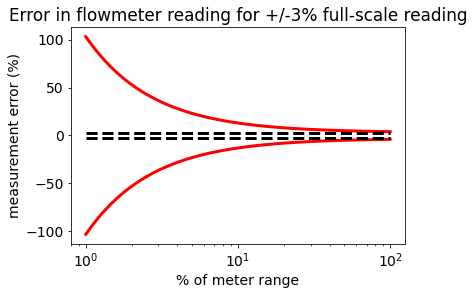

In [2]:
vrate = np.logspace(0,2)
error = (1 + 0.03*vrate)/vrate*100
plt.semilogx(vrate, error, 'r-')
plt.semilogx(vrate, -error, 'r-')
plt.semilogx(vrate, 3*np.ones(vrate.shape), 'k--')
plt.semilogx(vrate, -3*np.ones(vrate.shape), 'k--')
plt.xlabel('% of meter range')
plt.ylabel('measurement error (%)')
plt.title('Error in flowmeter reading for +/-3% full-scale reading');

### Flowrate Meter Caliberation Example - Venturi meter



#### Problem 1 

Let's consider a pipe installed with venturi meter to measure the volume flowrate through the pipe. Following table consists of actual flowrate $Q$ (measured by some reference technique), and pressure drop $\Delta p$, recorded by venturi meter. Obtain the caliberation curve coeffcients of the venturi meter using linear regression. 


|$Q$, LPM| $\Delta p$, (mm of water)
|---     | ---        | 
|11.37   | 55         | 
|9.84    | 44         | 
|9.00    | 34         | 
|8.10    | 28         | 
|7.00    | 22         | 
|6.00    | 18         | 
|4.34    | 8          | 


Caliberation equation for venturi meter is Q = 1.510 Δp^0.5 
 
Caliberation coefficent   1.510 +/- 0.015 



Text(0, 0.5, 'Q (LPM)')

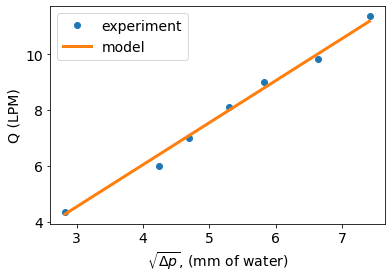

In [3]:
from scipy.optimize import curve_fit


def func(x,k):
    '''fits the linear equation y = kx
    This equation can be replaced by polynomial or exponential 
    as per the fitting goals of the problem'''
    return k*x

Q = [11.37,9.84,9.00,8.10,7.00,6.00,4.34]   # LPM
dp = [55,44,34,28,22,18,8]                  # mm of water

k,pcov=curve_fit(func, np.sqrt(dp), Q)  #we are trying to fit Q = k*(dp)^0.5
k_error=np.sqrt(pcov[0,0])

print("Caliberation equation for venturi meter is Q = %1.3f \u0394p^0.5 \n "%(k))
print("Caliberation coefficent   %1.3f +/- %1.3f \n"%(k,k_error))

plt.plot(np.sqrt(dp),Q,'o',label='experiment')
plt.plot(np.sqrt(dp),func(np.sqrt(dp),k),label='model')
plt.legend()
plt.xlabel(r'$\sqrt{\Delta p}$, (mm of water)')
plt.ylabel('Q (LPM)')

#### Check your work

In the above example, fit the data to power function of the form 

$\small Q = a (\Delta p)^b$

what is the value of a and b? Do you think power function is better fit than the linear equation fit for the venturi-meter data?

In [ ]:
## # enter your work here - Uncomment the following lines of code and make necessary changes

# def power_func(x,a,b):
#     '''fits the linear equation y = kx
#     This equation can be replaced by polynomial or exponential 
#     as per the fitting goals of the problem'''
#     return ??

# Q = np.array([11.37,9.84,9.00,8.10,7.00,6.00,4.34])   # LPM
# dp = np.array([55,44,34,28,22,18,8])                  # mm of water

# k,pcov=??
# a = k[0]
# b = k[1]

# print("Caliberation equation for venturi meter is Q = %1.3f \u0394p^%1.3f "%(a,b))

# plt.plot(dp,Q,'o',label='experiment')
# plt.plot(dp,power_func(dp,a,b),label='model')
# plt.legend()
# plt.xlabel(r'$\sqrt{\Delta p}$, (mm of water)')
# plt.ylabel('Q (LPM)')


import check_lab03 as p
p.check_p01(a,b)


## Procedure 

The procedure and details of the experiment are included in a lab-handout [1].

[ME3264_Lab_3a_Fluid_Flow_Measurement.pdf](https://drive.google.com/file/d/1H4aeHknTJzxyPItLyjnBkoUFeRymS8kI/view?usp=sharing)


## Notes on error propagation and uncertainties

For this lab, you should prepare calibration equations for each device. Also include an estimate of the uncertainty
for calibration coefficients (i.e., the coefficients of each equation).

You should include a comparison of the relative coefficient uncertainty between devices, whether a linear regression is an appropriate technique, and the relative appropriateness of using a “universal” calibration for any one type of device (e.g., should you use the same calibration equation for two Venturi meters with the same nominal dimensions).


## References 

1. [ME3264_Lab_3a_Fluid_Flow_Measurement.pdf](https://drive.google.com/file/d/1H4aeHknTJzxyPItLyjnBkoUFeRymS8kI/view?usp=sharing)
2. [Notes on error propagation, ME 3264- Lab 1 - Heat Engine Notebook ](https://cooperrc.github.io/applied_measurements/lab_01/ME3264_Lab-01.html#lab-1-heat-engine)
3. B.R. Munson, D.F. Young, T.H. Okiishi, and W.W. Huebsch, Fundamentals of Fluid Mechanics, Seventh
Edition, Chapter 8
4. [IDC instrumentation manual](https://www.idc-online.com/technical_references/pdfs/instrumentation/Industrial_Instrumentation%20-%20Flow.pdf)
5. [Flow meter error](https://en.wikipedia.org/wiki/Flow_meter_error) 
6. [Liquid Flow Meter Performance & Specification: Glossary](https://www.flowmeters.co.uk/liquid-flow-meter-performance-specification-glossary/)
